<a href="https://colab.research.google.com/github/eldorjonneymatov/mdev_ds_pract/blob/main/deep_learning/ball_classifier_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating classifier model with fastai

## Loading data
For this model, we use an [open images dataset](https://storage.googleapis.com/openimages/web/index.html). And we download images from it with the OID toolkit.

In [1]:
# cloning the oid toolkit repository
!git clone https://github.com/NanoCode012/OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format.git

Cloning into 'OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format'...
remote: Enumerating objects: 548, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 548 (delta 2), reused 5 (delta 2), pack-reused 542
Receiving objects: 100% (548/548), 34.16 MiB | 37.46 MiB/s, done.
Resolving deltas: 100% (218/218), done.


In [2]:
# installing required packages
!cd OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format && pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.9 MB 5.0 MB/s 
     |████████████████████████████████| 79 kB 11.0 MB/s 
     |████████████████████████████████| 9.1 MB 50.3 MB/s 
     |████████████████████████████████| 636 kB 76.3 MB/s 
     |████████████████████████████████| 548 kB 75.1 MB/s 
     |████████████████████████████████| 139 kB 69.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: docutils
    Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:


In [3]:
# getting help about the toolkit options
!cd OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format && python main.py -h

usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0]
               [--image_IsGroupOf 1 or 0] [--image_IsDepiction 1 or 0]
               [--image_IsInside 1 or 0] [--multiclasses 0 (default or 1]
               [--n_threads [default 20]] [--noLabels]
               [--limit integer number] [--yoloLabelStyle]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.

Open Image Dataset Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
                        'downloader', 'visualizer' or 'ill_downloader'.

optional arguments:
  -h, --help            show this help message and exit
  --Dataset /path/to/OID/csv/
                        Dire

In [4]:
# downloading images
!cd OIDv6_ToolKit_Download_Open_Images_Support_Yolo_Format && python main.py downloader --Dataset /content --classes Football Golf_ball Tennis_ball --type_csv train --limit 250 --noLabel

    [INFO] |  saving dataset configurations at /content/config.json

		   ___   _____  ______            _    _       _    _  
		 .'   `.|_   _||_   _ `.         | |  | |     | |  | |    
		/  .-.  \ | |    | | `. \ _   __ | |__| |_    |  | | |   
		| |   | | | |    | |  | |[ \ [  ]|____   _|     | | | 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_       | |
		 `.___.'|_____||______.'   \__/     |_____|     |_|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Football.
   [ERROR] | Missing the train-annotations-bbox.csv fi

In [5]:
# function for moving images from the 'Class/images' folder to the parent 'Class' folder
from os.path import join
from os import listdir
from shutil import move, rmtree
def move_to_parent(categories):
  for cat in categories:
    root = join('/content/train', cat)
    for filename in listdir(join(root, 'images')):
      move(join(root, 'images', filename), join(root, filename))
    rmtree(join(root, 'images'), ignore_errors=True)

In [6]:
# moving images to their parent folders
categories = ['Football', 'Golf ball', 'Tennis ball']
move_to_parent(categories)  

In [7]:
# creating a path object 
from fastai.vision.all import *
path = Path('train')
path.ls()

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


(#3) [Path('train/Golf ball'),Path('train/Tennis ball'),Path('train/Football')]

In [8]:
# getting all images from the path
fns = get_image_files(path)
fns

(#750) [Path('train/Golf ball/f030a6f2441bdcde.jpg'),Path('train/Golf ball/33531d29129fcfeb.jpg'),Path('train/Golf ball/28937729bb067e85.jpg'),Path('train/Golf ball/a1242b5d430fcf3c.jpg'),Path('train/Golf ball/b580bc8fb8710d27.jpg'),Path('train/Golf ball/13cf4a62741a7176.jpg'),Path('train/Golf ball/03a59eb2b6d85cd4.jpg'),Path('train/Golf ball/a051509bd39d69f8.jpg'),Path('train/Golf ball/84e986f09d114f9e.jpg'),Path('train/Golf ball/17bf3a34d33542b1.jpg')...]

In [9]:
# checking images for fail
failed = verify_images(fns)
failed

(#0) []

In [10]:
# removing all failed images
failed.map(Path.unlink)

(#0) []

In [11]:
# creating a data block
balls = DataBlock(
  blocks = (ImageBlock, CategoryBlock),
  get_items = get_image_files,
  splitter = RandomSplitter(valid_pct=0.2, seed=42),
  get_y = parent_label,
  item_tfms = Resize(128)
)

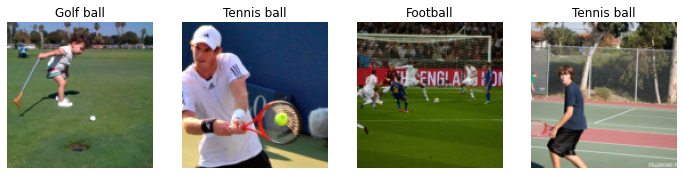

In [12]:
# creating a dataloaders from the data block
dls = balls.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

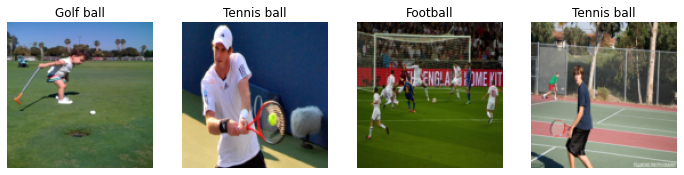

In [13]:
# resizing images with the squish method
balls.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = balls.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

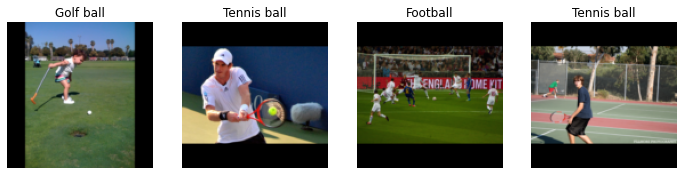

In [14]:
# resizing and padding images
balls.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = balls.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

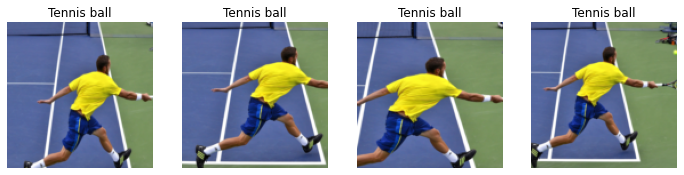

In [15]:
# random cropping of images
balls.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = balls.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

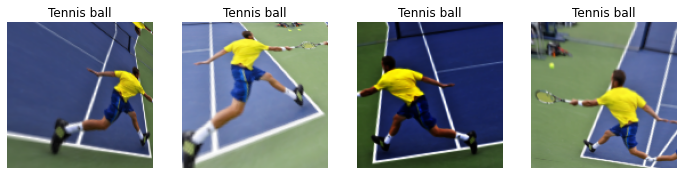

In [16]:
# data augmentation
balls.new(item_tfms=Resize(128),
    batch_tfms=aug_transforms(mult=2))
dls = balls.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [17]:
balls.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
         batch_tfms=aug_transforms())
dls = balls.dataloaders(path)

In [18]:
# creating a model with the resnet34
learn = vision_learner(dls, arch=resnet34, metrics=[accuracy, error_rate])
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.442484,0.276244,0.906667,0.093333,00:15


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.369266,0.206736,0.913333,0.086667,00:13
1,0.271490,0.309757,0.906667,0.093333,00:13
2,0.228414,0.214569,0.933333,0.066667,00:13
3,0.185630,0.209044,0.933333,0.066667,00:13


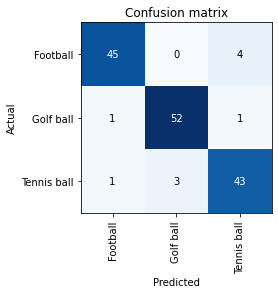

In [19]:
# confusion matrix
intrep = ClassificationInterpretation.from_learner(learn)
intrep.plot_confusion_matrix()

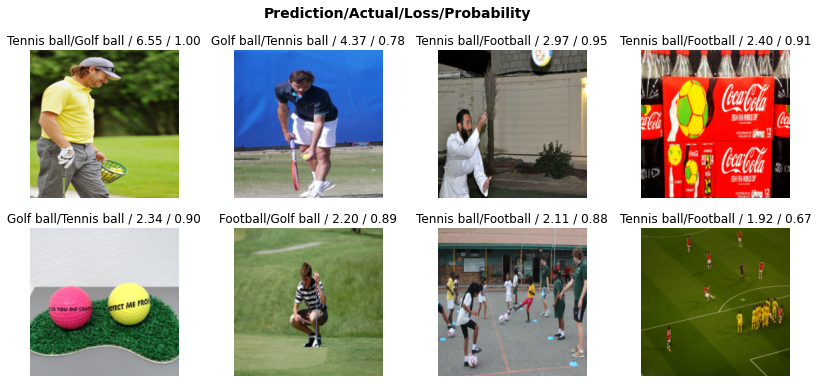

In [20]:
# top losses
intrep.plot_top_losses(8, nrows=2, figsize=(14,6))

In [21]:
# fastai cleaner
from fastai.vision.widgets import ImageClassifierCleaner
cleaner = ImageClassifierCleaner(learn)
cleaner

In [22]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [23]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat) 

In [24]:
# learn = vision_learner(dls, arch=resnet34, metrics=[accuracy, error_rate])
# learn.fine_tune(4)

In [31]:
# exporting the model
learn.export('ball_classifier.pkl')

In [33]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('ball_classifier.pkl')]

In [34]:
# loading the exported model
learn_inf = load_learner(path/'ball_classifier.pkl')

class: Football
probability: 0.999999


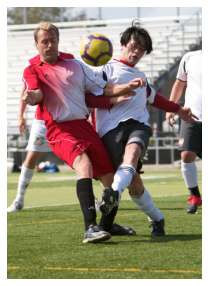

In [28]:
# test
img_path = path/'train'/'Football'/listdir(path/'train'/'Football')[42]
img = PILImage.create(img_path)
img.show()
pred, pred_idx, probs = learn_inf.predict(img)
print(f"class: {pred}")
print(f"probability: {probs[pred_idx]:.6f}")

In [29]:
# getting the model labels
learn_inf.dls.vocab

['Football', 'Golf ball', 'Tennis ball']

### Link to the model
* [github repository](https://github.com/eldorjonneymatov/ball_classifier_fastai.git)
* [streamlit app](https://eldorjonneymatov-ball-classifier-fastai-app-vnvy5p.streamlitapp.com/)